<a href="https://colab.research.google.com/github/sashmos/Data-Mining-Homework/blob/main/1.%20%D0%92%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5/3_%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_%D0%92%D0%B8%D0%B7%D1%83%D0%B0%D0%BB%D1%8C%D0%BD%D1%8B%D0%B9_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85_(Matplotlib_Seaborn_Pandas)_%D0%A7%D0%B0%D1%81%D1%82%D1%8C_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практика. Визуальный анализ данных (Matplotlib/Seaborn/Pandas). Часть 1

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.

#### Полезная литература
- [**Блокнот с теорией**](https://colab.research.google.com/github/Alexandre77777/data_mining/blob/main/1.%20%D0%92%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5/%D0%A2%D0%B5%D0%BE%D1%80%D0%B8%D1%8F/3.%20%D0%A2%D0%B5%D0%BE%D1%80%D0%B8%D1%8F_Matplotlib_Seaborn_Plotly.ipynb)
- [Галерея графиков Matplotlib](https://matplotlib.org/gallery/index.html)
- [Галерея графиков Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Открытый курс машинного обучения. Тема 2: Визуализация данных c Python](https://habr.com/company/ods/blog/323210/)

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

## Визуальный анализ данных

В этом задании вам предлагается провести визуальный анализ датасета о прокатах велосипедов https://www.kaggle.com/c/bike-sharing-demand/data. Оригинальная задача предполагает построение модели предсказания количества прокатов в городе в зависимости от погоды.

Для каждого дня проката известны следующие признаки (как они были указаны в источнике данных):
- season: 1 - весна, 2 - лето, 3 - осень, 4 - зима
- yr: 0 - 2011, 1 - 2012
- mnth: от 1 до 12
- holiday: 0 - нет праздника, 1 - есть праздник
- weekday: от 0 до 6
- workingday: 0 - нерабочий день, 1 - рабочий день
- weathersit: оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман)
- temp: температура в Цельсиях
- atemp: температура по ощущениям в Цельсиях
- hum: влажность
- windspeed(mph): скорость ветра в милях в час
- windspeed(ms): скорость ветра в метрах в секунду
- cnt: количество арендованных велосипедов (это целевой признак, его мы будем предсказывать)

Загрузите с помощью pandas файл `bikes_rent.csv.gz` и выведите первые 5 строк. Ознакомьтесь с данными с помощью функций describe и info.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/Othercomputers/sashmos_laptop/3 семестр (магистр)/Интеллектуальный анализ данных/1. Введение/bikes_rent.csv')

df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          731 non-null    int64  
 1   yr              731 non-null    int64  
 2   mnth            731 non-null    int64  
 3   holiday         731 non-null    int64  
 4   weekday         731 non-null    int64  
 5   workingday      731 non-null    int64  
 6   weathersit      731 non-null    int64  
 7   temp            731 non-null    float64
 8   atemp           731 non-null    float64
 9   hum             731 non-null    float64
 10  windspeed(mph)  731 non-null    float64
 11  windspeed(ms)   731 non-null    float64
 12  cnt             731 non-null    int64  
dtypes: float64(5), int64(8)
memory usage: 74.4 KB


Давайте посмотрим на графиках, как целевой признак зависит количество прокатов (cnt) зависит от остальных признаков `df.columns[:-1]`.

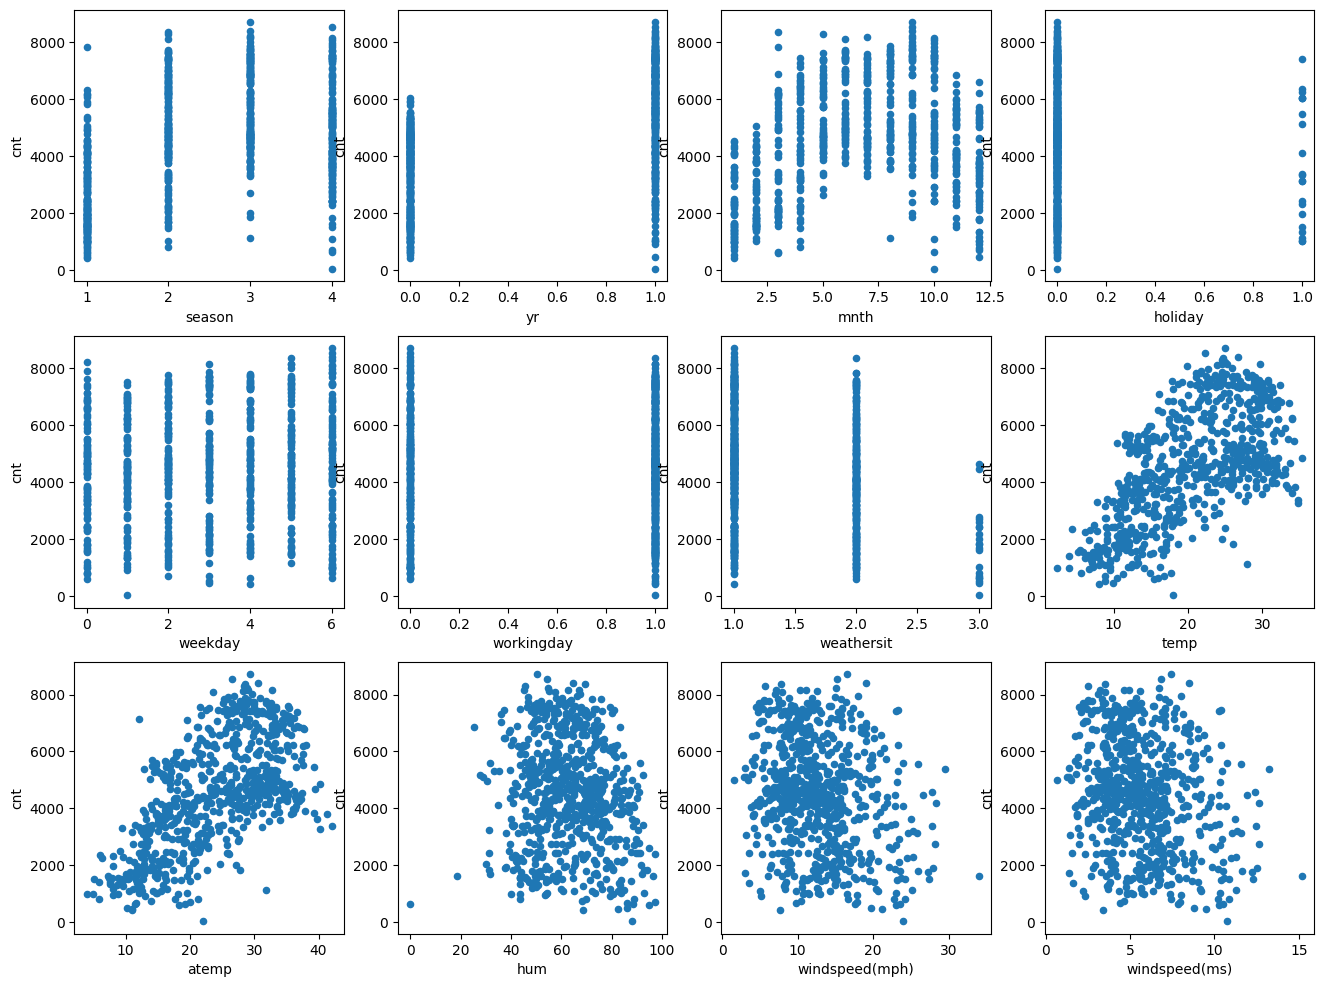

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 12))
for idx, feature in enumerate(df.columns[:-1]):
     df.plot(feature, "cnt", subplots=True, kind="scatter", ax=axes[idx // 4, idx % 4])

## 1. Ответьте на вопросы:

#### Каков характер зависимости числа прокатов от месяца?

ответ: Число проакатов увеличивалось к лету в остальные сезоны число прокатов на спаде. Синусоидный характер зависимости с медианным распределением в летний сезон.

#### Укажите один или два признака, от которых число прокатов скорее всего зависит линейно
_(чем больше значение, тем больше прокатов или наоборот, например)_

Можете проверить результат с помощью lnplot.

ответ: От признака температуры (temp) и температуры по ощущениям (atemp)

Проверка с помощью Implot

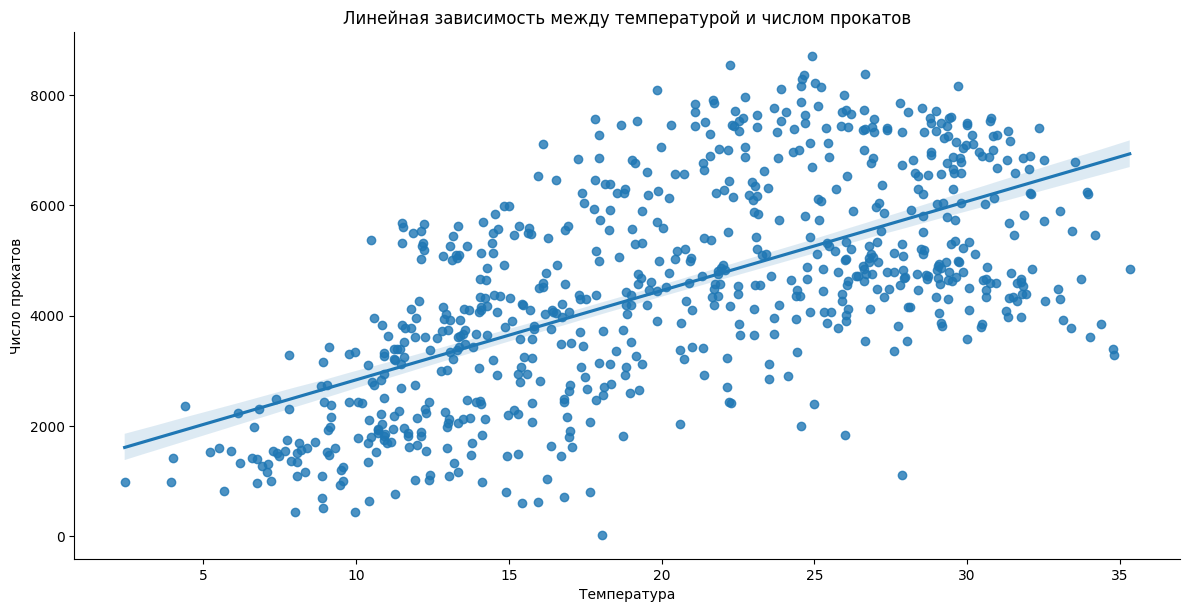

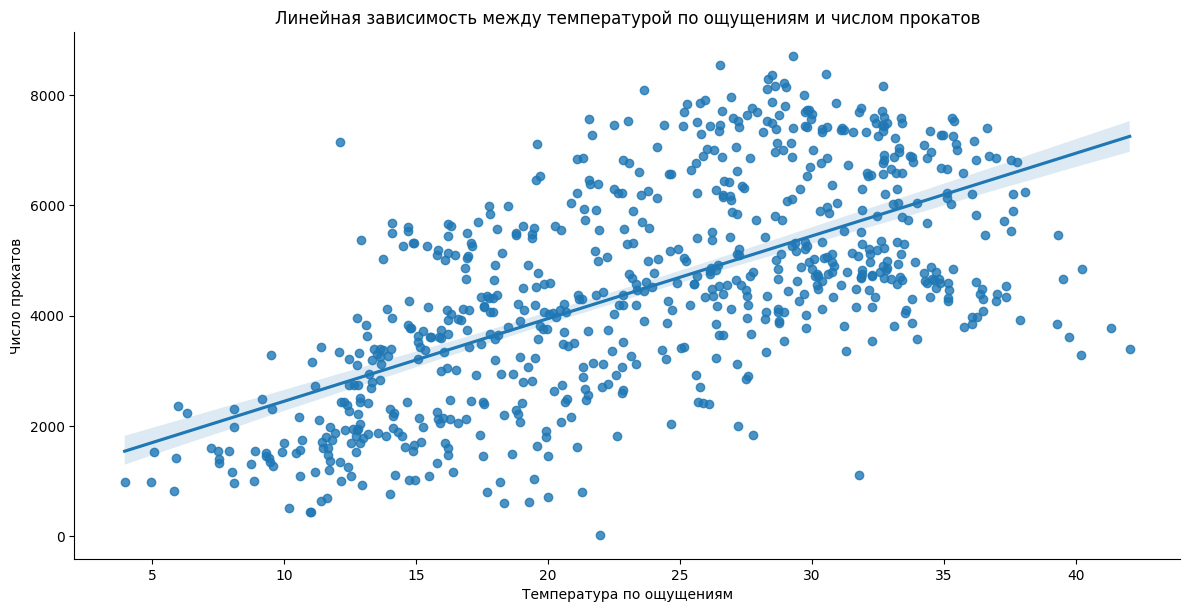

In [ ]:
# График линейной зависимости между фактической температурой и числом прокатов
sns.lmplot(x='temp', y='cnt', data=df, height=6, aspect=2)

plt.title('Линейная зависимость между температурой и числом прокатов')
plt.xlabel('Температура')
plt.ylabel('Число прокатов')

plt.show()

# График линейной зависимости между температурой по ощущениям и числом прокатов
sns.lmplot(x='atemp', y='cnt', data=df, height=6, aspect=2)

plt.title('Линейная зависимость между температурой по ощущениям и числом прокатов')
plt.xlabel('Температура по ощущениям')
plt.ylabel('Число прокатов')

plt.show()

## 2. Корреляционная матрица

Напомним, что корреляция отражает взаимосвязь двух случайных величин. Она бывает положительная и отрицательная. Чем ближе коэффициент корреляции к нулю, тем меньше взаимосвязь. Чем больше абсолютная корреляци, тем взаимосвязь больше.

Постройте heatmap корреляционной матрицы. Матрица формируется средствами pandas, со стандартным значением параметров.

**Ответьте на вопрос**: с какими признаками количество прокатов коррелирует меньше всего (около 4 штуки). А с какими больше всего?

Тепловая карта корреляционной матрицы

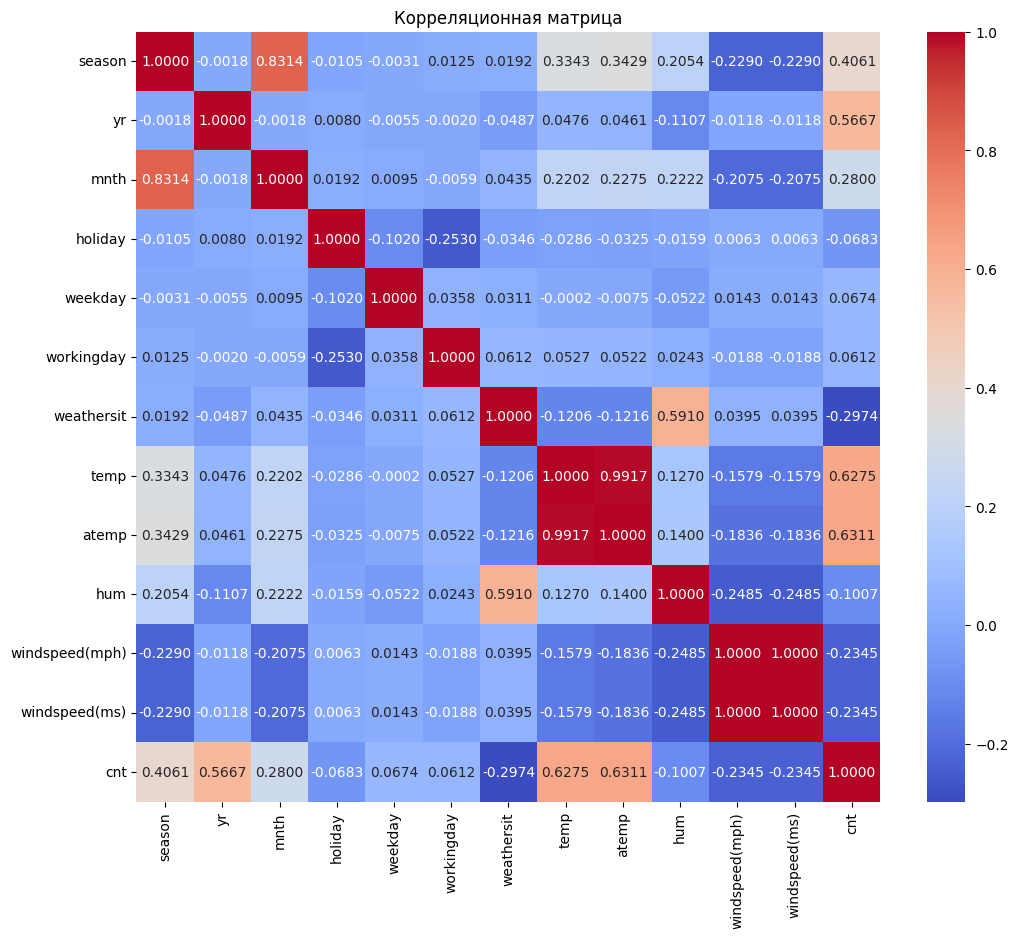

In [ ]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".4f")
plt.title('Корреляционная матрица')
plt.show()

Ответ:
Самая низкая корреляция наблюдается между:
 - годом (yr) и сезоном (season)
 - месяцом (mnth) и годом (yr)
 - днем недели (weekday) и сезоном (season)
 - днем недели (weekday) и температурой (temp).
 - сезоном (season) и рабочим днем (workingday)
Во всех случаях она максимально близка к 0.

Самая высокая корреляция наблюдается между:
- Температурой по ощущениям (atemp) и фактической температурой (temp): 0.99
- Месяцем (mnth) и сезоном (season): 0.83.
- Количеством прокатов (cnt) и температурой (temp): 0.63
- Количеством прокатов (cnt) и температурой по ощущениям (atemp): 0.63
- Оценкой благоприятности погоды (weathersit) и влажностью (hum): 0.59
- Количество прокатов (cnt) и годом (yr): 0.57


## 3. Barpot

Постройте Bar-график суммарного количества прокатов велосипедов по месяцам за каждый год одновременно. (будет 24 столбика)

**Ответьте на вопрос:** почему в предыдущем графике была такая большая корреляция между количеством прокатов и годом?

<Figure size 1200x600 with 0 Axes>

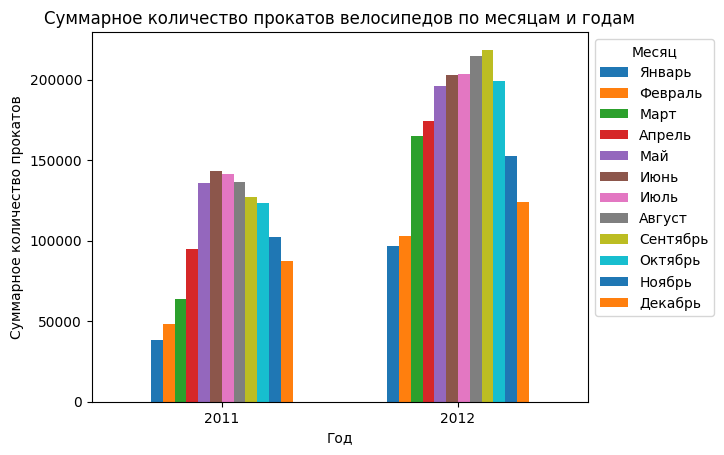

In [ ]:
selection = df.groupby(['yr', 'mnth'])['cnt'].sum().unstack()

plt.figure(figsize=(12, 6))
selection.plot(kind='bar', width=0.6)
plt.title('Суммарное количество прокатов велосипедов по месяцам и годам')
plt.xlabel('Год')
plt.ylabel('Суммарное количество прокатов')
plt.legend(title='Месяц',
           labels=['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь'],
           bbox_to_anchor=(1, 1), loc='upper left'
           )
plt.gca().set_xticklabels(['2011', '2012'])
plt.xticks(rotation=0)

plt.show()

Ответ: Большая корреляция между количеством прокатов и годом может быть связана с ростом популярности велосипедов, открытием новых сервисов доставки товаров на велосипедах или любыми другими внешними факторами, которые мы не можем пранализировать опираясь на имеющиеся данные о погоде или временах года.

## 4. Countplot

Постройте countplot диаграммы для признаков `weekday`, `weathersit`,

**Ответьте на вопрос:** что вы можете сказать о том, как формировался этот датасет.

**Ответьте на вопрос:** как называется распределение значений признака `weekday`?

Ответ: Датасет формировался на данных которые собирались ежедневно в течении двух лет за 2011 и 2012 года, это данные о прокатах велосипедов, погоде, днях недели, праздничных днях, месяцах и сезонах.
    
Ответ: Распределение значений признака weekday можно назвать равномерным т.к. одинаковое кол-во записей в датасете, которые равнозначны с точки зрения вероятности и не подвержен влиянию других признаков.

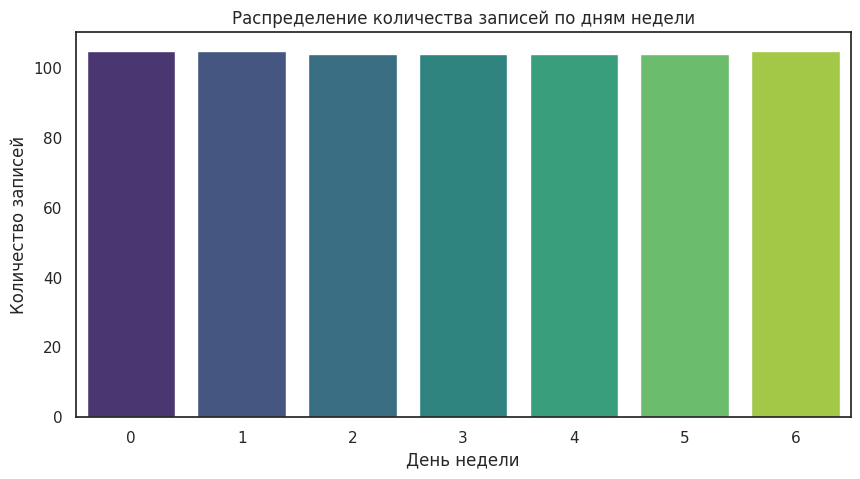

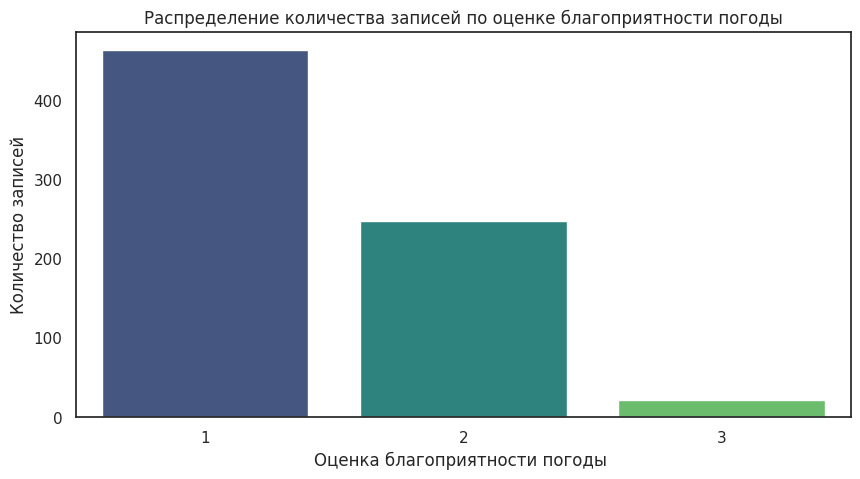

In [ ]:
# Диаграмма для признака 'weekday'
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='weekday', palette='viridis')
plt.title('Распределение количества записей по дням недели')
plt.xlabel('День недели')
plt.ylabel('Количество записей')
plt.show()

# Диаграмма для признака 'weathersit'
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='weathersit', palette='viridis')
plt.title('Распределение количества записей по оценке благоприятности погоды')
plt.xlabel('Оценка благоприятности погоды ')
plt.ylabel('Количество записей')
plt.show()

## 5. Распределение

Постройте распределение целевого признака.

**Ответьте на вопрос:** основываясь на графике, сколько приблизительно в среднем прокатов бывает в день?

**Ответьте на вопрос:** Как называется полученное распределение?.

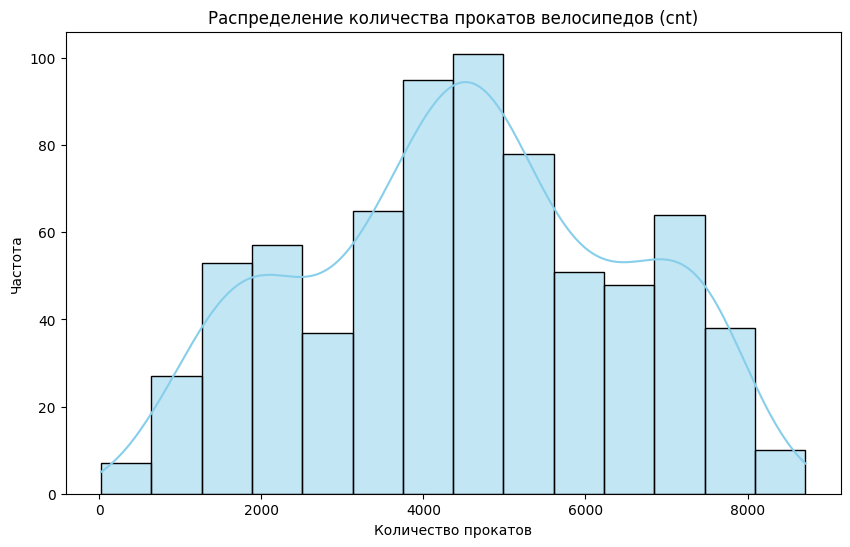

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['cnt'], kde=True, color='skyblue')
plt.title('Распределение количества прокатов велосипедов (cnt)')
plt.xlabel('Количество прокатов')
plt.ylabel('Частота')
plt.show()

Ответ: Приблизительно 4500-4700 прокатов в день

Ответ: Нормальное распределение

## 6. Совместное распределение признаков

Постройте график совместного распределения признаков температура и ощущение температуры.

**Ответьте на вопрос:** вас в этом графике ничего не настораживает? Почему?

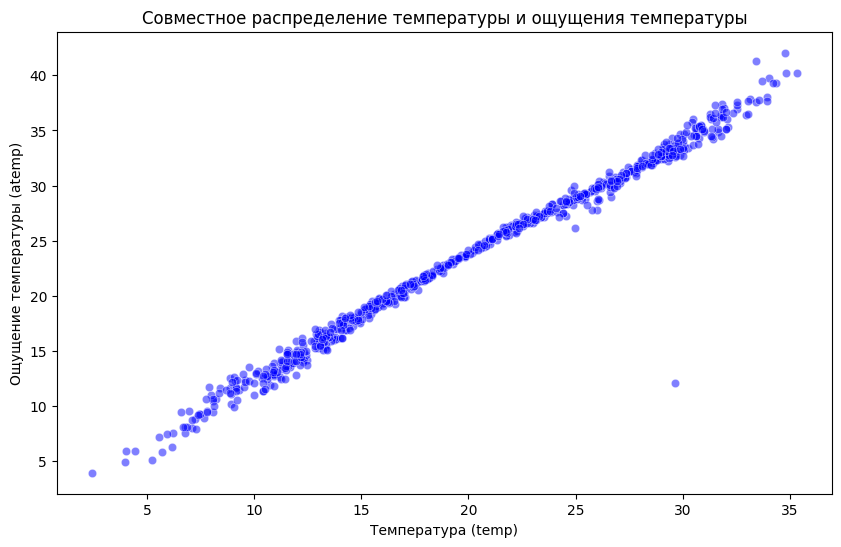

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='temp', y='atemp', alpha=0.5, color='blue')
plt.title('Совместное распределение температуры и ощущения температуры')
plt.xlabel('Температура (temp)')
plt.ylabel('Ощущение температуры (atemp)')
plt.show()

Ответ: По графику можно сказать, что atemp и temp сильно коррелируют между собой, что ожидаемо.
Настораживает только увеличение разброса значений на концах графика, что может быть обусловлено следующими факторами:
- Неточночти в измерениях фактической температуры
- Искажение восприятия температуры из-за разных других факторов, например влажности, ветра и т.д.


## 7. Боксплот (ящик с усами)

Постройте график распределения (боксплот) количества прокатов велосипедов по месяцам в зависимости от того рабочий это день или нет.

**Ответьте на вопрос:** почему в некоторых месяцах чаще берут велосипеды в будний день, а в некоторые - в выходной.


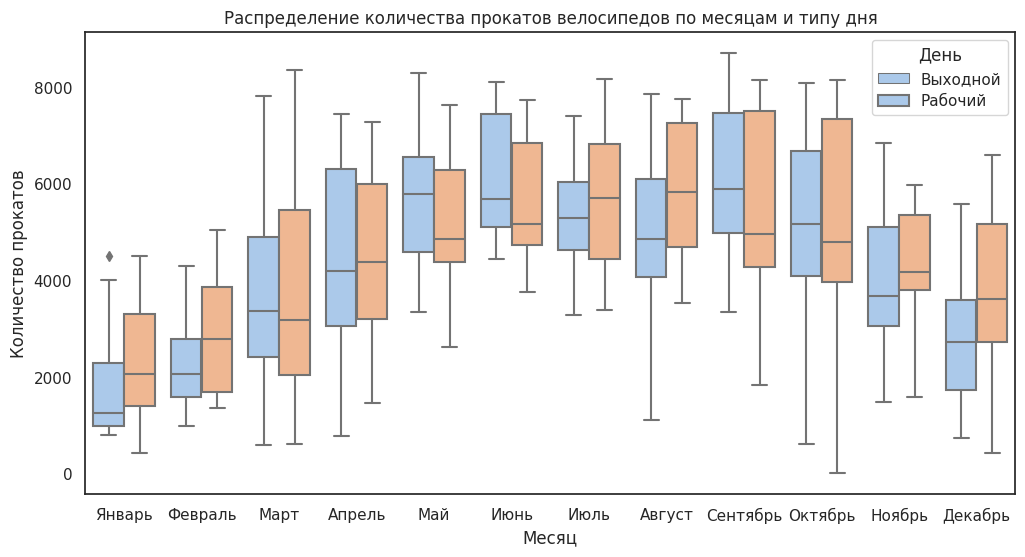

In [ ]:
plt.figure(figsize=(12, 6))

xlabels=['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь']
sns.set(style="white", palette = 'pastel', color_codes=True)

sns.boxplot(data=df, x='mnth', y='cnt', hue='workingday')
plt.title('Распределение количества прокатов велосипедов по месяцам и типу дня')
plt.xlabel('Месяц')
plt.ylabel('Количество прокатов')
plt.legend(title='День', labels=['Выходной', 'Рабочий'])
plt.gca().set_xticklabels(xlabels)

plt.show()

Ответ: В будние жаркие дни (весна, лето) велосипед чаще берут для подработки/работы или же в случаях летнего отдыха, в выходные жаркие дни велосипеды берут для отдыха, в холодное время (ноябрь, декабрь, январь, февраль) велосипеды используются реже и то в рабочих целях.